In [66]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score

In [67]:
df=pd.read_csv('Desktop/creditcard.csv')

In [68]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [69]:
#checking for missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#no missing values are there

In [70]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [71]:
df.shape

(284807, 31)

In [72]:
#checking of duplicates
np.where(df.duplicated()==True)

(array([    33,     35,    113, ..., 283485, 284191, 284193], dtype=int64),)

In [73]:
#dropping of duplicates 
df.drop_duplicates(inplace=True)

In [74]:
df.shape

(283726, 31)

In [75]:
np.where(df.corr()>0.8)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       dtype=int64))

In [76]:
np.where(df.corr()<-0.8)

(array([], dtype=int64), array([], dtype=int64))

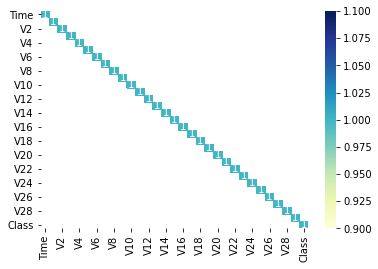

In [77]:
#Checking of Correlation
corrmat=df.corr()
kot=corrmat[corrmat>=0.8]
dataplot = sb.heatmap(kot, cmap="YlGnBu", annot=True)
mp.show()

#there is not the presence of high correlation between columns of dataframe, hence not remove any column.

In [78]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWar

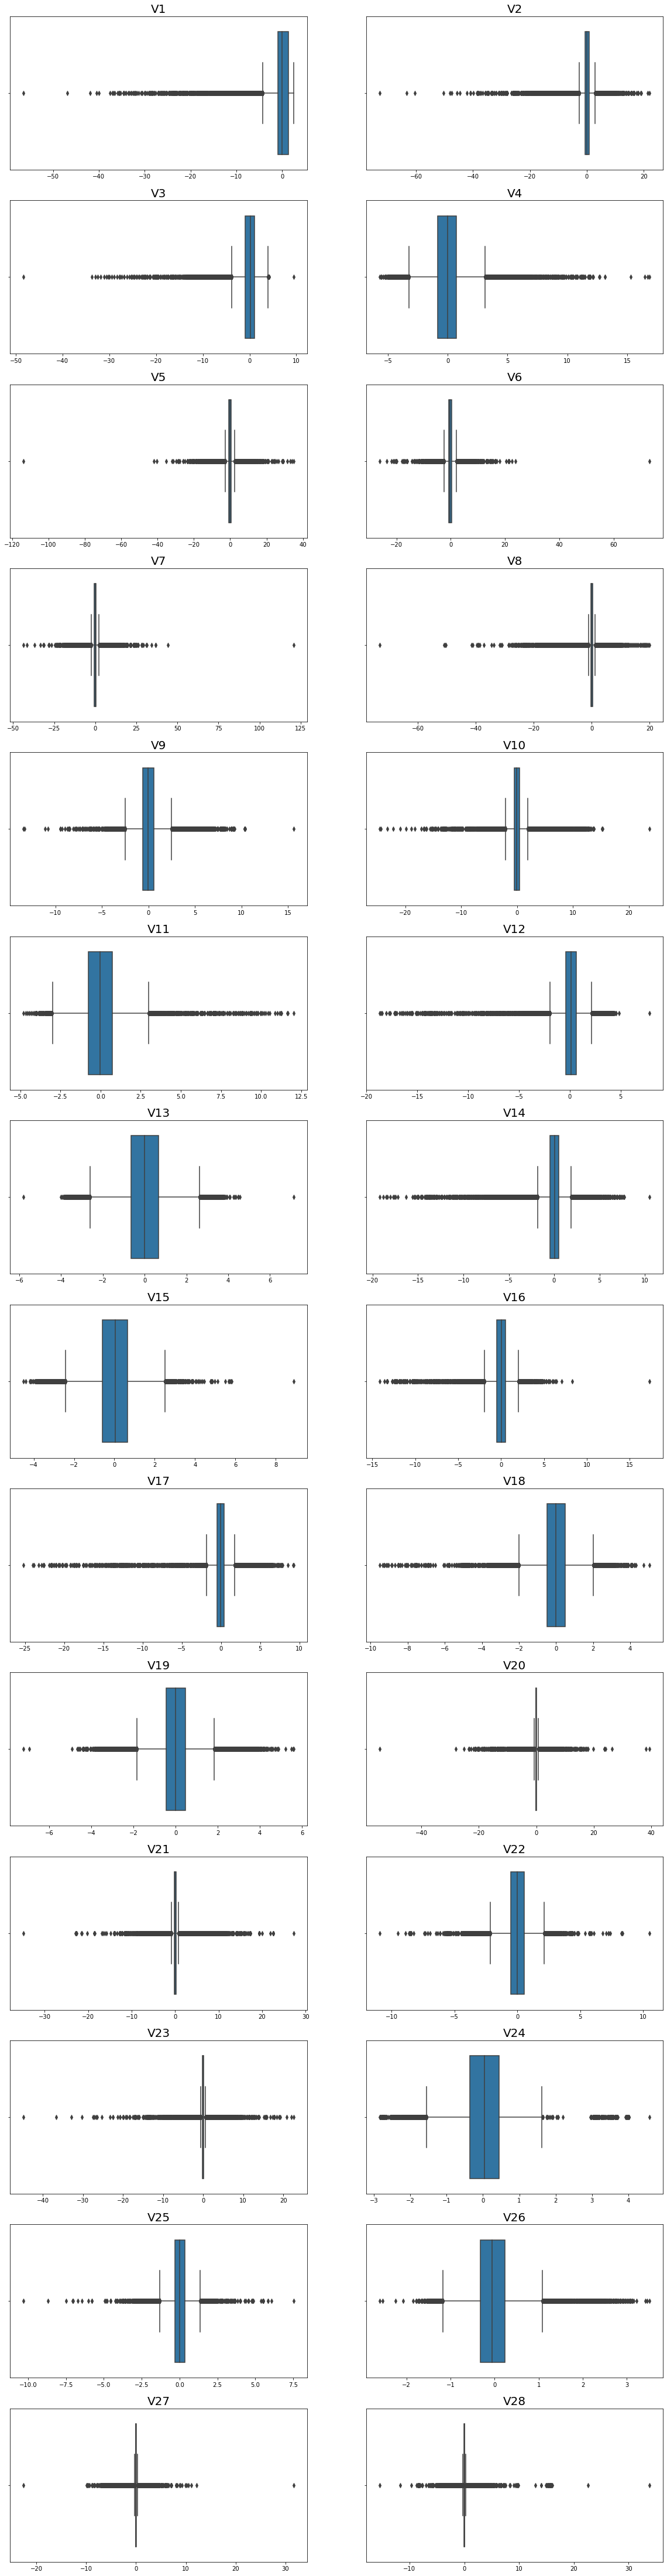

In [83]:
#checking the prsence of outliers using boxplot
import matplotlib.gridspec as gridspec
columns =df.iloc[:,1:29].columns

grid = gridspec.GridSpec(14, 2)
mp.figure(figsize=(20,20*4))

for n, col in enumerate(df[columns]):
    ax = mp.subplot(grid[n])
    sb.boxplot(df[col])
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
mp.show()

#Outliers are present but we should not remove it, as it is a sign of fradulent activity

In [17]:
#seperating the data for analysis
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [18]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [19]:
#statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#mean amount of fraud is greater than legit transaction.

In [22]:
#compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [23]:
#this difference is required for machine learning model to find the difference between fraud and legit transaction

In [24]:
X=df.drop(columns='Class',axis=1)
Y=df['Class']

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [49]:
print(X.shape,X_train.shape,X_test.shape)

(283726, 30) (226980, 30) (56746, 30)


In [50]:
def value_roc(y_test,y_pred,plot=False):
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
  auc_score = metrics.auc(fpr, tpr)
  if plot:
    mp.figure(figsize=(7,6))
    mp.plot(fpr,tpr,color='red',label='ROC(AUC=%0.3f)'% auc_score)
    mp.legend(loc='lower right')
    mp.title('ROC Curve')
    mp.xlabel("FPR")
    mp.ylabel('TPR')
    print(f'\n AUC Score:',auc_score)
    return

In [51]:
def model_calculation(y_test,y_test_pred,y_train,y_train_pred):
    print("Accuracy Score of train data:{}\n".format(accuracy_score(y_train,y_train_pred)))
    print("Accuracy Score of test data:{}\n".format(accuracy_score(y_test,y_test_pred)))
    print("Classification Report:{}\n",classification_report(y_test,y_test_pred))
    print("\n F1 Score: {}".format(f1_score(y_test,y_test_pred)))
    cm=confusion_matrix(y_test,y_test_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    mp.figure(figsize=(5,3))
    sb.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')
    value_roc(y_test,y_test_pred,plot=True)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:

Accuracy Score of train data:0.9989955062120011

Accuracy Score of test data:0.9990307686885419

Classification Report:{}
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.73      0.67      0.70        95

    accuracy                           1.00     56746
   macro avg       0.86      0.84      0.85     56746
weighted avg       1.00      1.00      1.00     56746


 F1 Score: 0.6994535519125683

 AUC Score: 0.8366302819943718
Random Forest:

Accuracy Score of train data:0.9997136311569301

Accuracy Score of test data:0.9995065731505305

Classification Report:{}
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.76      0.84        95

    accuracy                           1.00     56746
   macro avg       0.97      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746


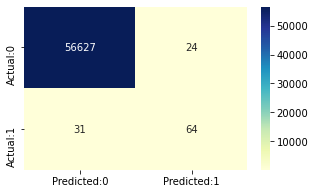

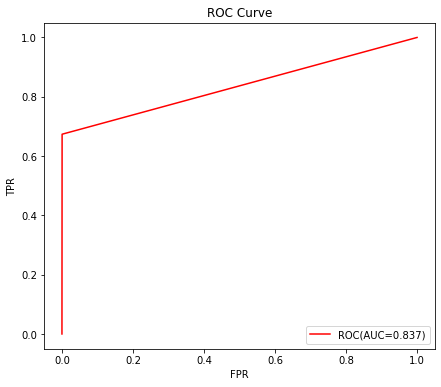

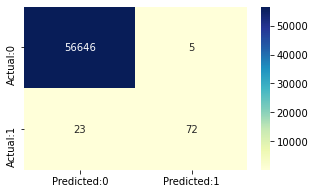

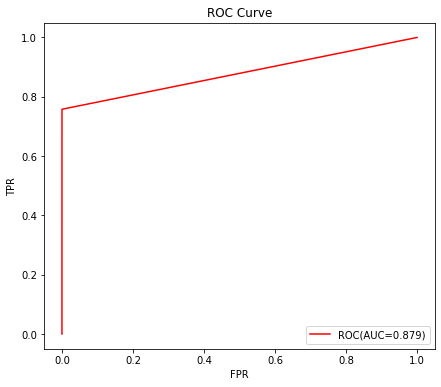

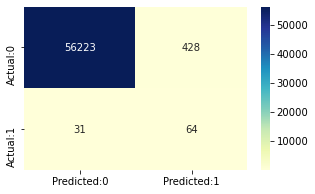

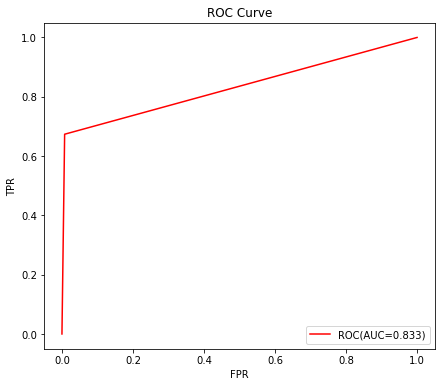

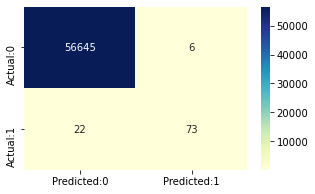

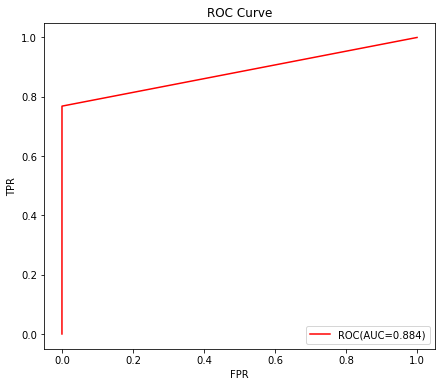

In [52]:
model=LogisticRegression()
#training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
X_train_pred=model.predict(X_train)
X_test_pred=model.predict(X_test)
print('Logistic Regression:\n')
model_calculation(Y_test,X_test_pred,Y_train,X_train_pred)

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='gini',max_depth=10,min_samples_split=5,min_samples_leaf=1)
classifier.fit(X_train,Y_train)
X_train_pred=classifier.predict(X_train)
X_test_pred=classifier.predict(X_test)
print('\nRandom Forest:\n')
model_calculation(Y_test,X_test_pred,Y_train,X_train_pred)

from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train,Y_train) # fitting the data
y_p = nv.predict(X_train)
y_pred = nv.predict(X_test)
print('\nNaive Bayes:\n')
model_calculation(Y_test,y_pred,Y_train,y_p)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=X_train.copy()
x2=X_test.copy()
scaler.fit(x1)
X_train=scaler.fit_transform(x1)
X_test=scaler.transform(x2)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
y_p=knn.predict(X_train)
y_pred = knn.predict(X_test)
print('\nKNN:\n')
model_calculation(Y_test,y_pred,Y_train,y_p)

# Random Under Sampling

In [53]:
#if we use under sampling than we can make better predictions

In [54]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=2)
X_us,y_us=us.fit_resample(X,Y)
X_us.shape,y_us.shape

((946, 30), (946,))

In [55]:
print('\nBalance of positive and negative classes:')
y_us.value_counts() 


Balance of positive and negative classes:


1    473
0    473
Name: Class, dtype: int64

In [56]:
X_train_us,X_test_us,Y_train_us,Y_test_us=train_test_split(X_us,y_us,test_size=0.2,stratify=y_us,random_state=2)
print(X_us.shape,X_train_us.shape,X_test_us.shape)

(946, 30) (756, 30) (190, 30)


Logistic Regression:

Accuracy Score of train data:0.9259259259259259

Accuracy Score of test data:0.9421052631578948

Classification Report:{}
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        95
           1       0.99      0.89      0.94        95

    accuracy                           0.94       190
   macro avg       0.95      0.94      0.94       190
weighted avg       0.95      0.94      0.94       190


 F1 Score: 0.9392265193370165

 AUC Score: 0.9421052631578948
Random Forest:

Accuracy Score of train data:0.9828042328042328

Accuracy Score of test data:0.9473684210526315

Classification Report:{}
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        95
           1       1.00      0.89      0.94        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190


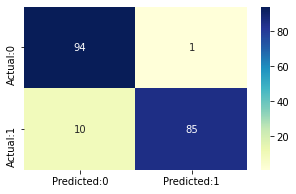

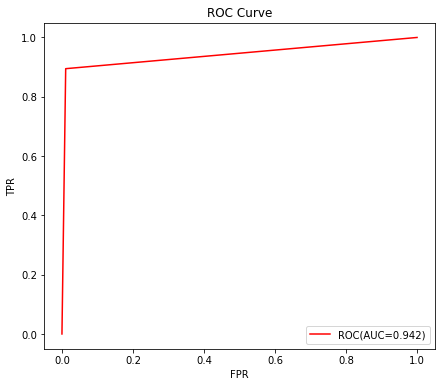

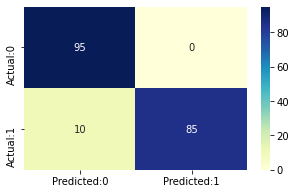

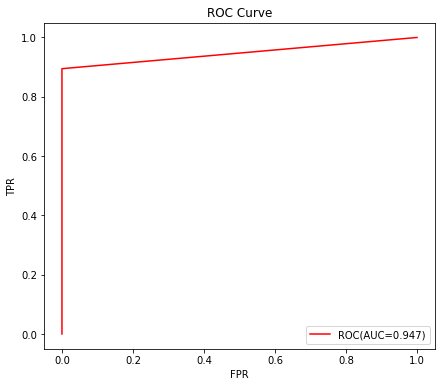

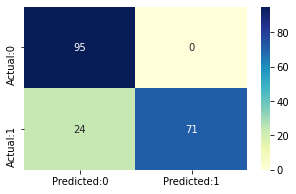

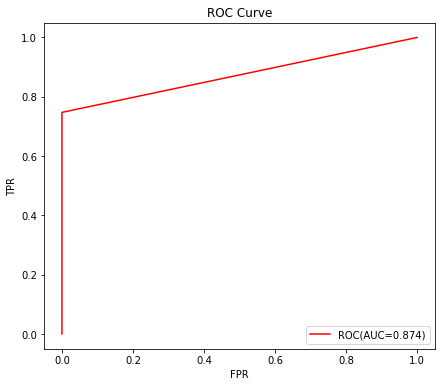

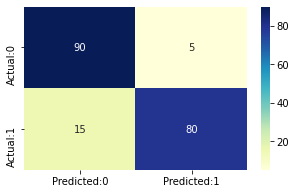

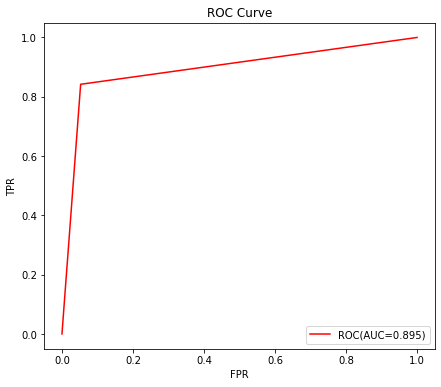

In [57]:
model=LogisticRegression()
#training the Logistic Regression Model with Training Data
model.fit(X_train_us, Y_train_us)
X_train_pred=model.predict(X_train_us)
X_test_pred=model.predict(X_test_us)
print('Logistic Regression:\n')
model_calculation(Y_test_us,X_test_pred,Y_train_us,X_train_pred)

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='gini',max_depth=10,min_samples_split=5,min_samples_leaf=1)
classifier.fit(X_train_us,Y_train_us)
X_train_pred=classifier.predict(X_train_us)
X_test_pred=classifier.predict(X_test_us)
print('\nRandom Forest:\n')
model_calculation(Y_test_us,X_test_pred,Y_train_us,X_train_pred)

from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train_us,Y_train_us) # fitting the data
y_p = nv.predict(X_train_us)
y_pred = nv.predict(X_test_us)
print('\nNaive Bayes:\n')
model_calculation(Y_test_us,y_pred,Y_train_us,y_p)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=X_train_us.copy()
x2=X_test_us.copy()
scaler.fit(x1)
X_train_us=scaler.fit_transform(x1)
X_test_us=scaler.transform(x2)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_us,Y_train_us)
y_p=knn.predict(X_train_us)
y_pred = knn.predict(X_test_us)
print('\nKNN:\n')
model_calculation(Y_test_us,y_pred,Y_train_us,y_p)

# Oversampling(SMOTE)

In [61]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=2)

X_sm, y_sm = sm.fit_resample(X, Y)

print("Shape of X before SMOTE: {}\nShape of X after SMOTE: {}".format(X.shape,X_sm.shape))

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts()

Shape of X before SMOTE: (283726, 30)
Shape of X after SMOTE: (566506, 30)

Balance of positive and negative classes (%):


1    283253
0    283253
Name: Class, dtype: int64

In [62]:
X_train_sm, X_test_sm, Y_train_sm, Y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=2)
print(X_sm.shape,X_train_sm.shape,X_test_sm.shape)

(566506, 30) (424879, 30) (141627, 30)


Logistic Regression:

Accuracy Score of train data:0.9701703308471353

Accuracy Score of test data:0.9710154137276085

Classification Report:{}
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     70621
           1       0.98      0.96      0.97     71006

    accuracy                           0.97    141627
   macro avg       0.97      0.97      0.97    141627
weighted avg       0.97      0.97      0.97    141627


 F1 Score: 0.970825900630388

 AUC Score: 0.97104024807285
Random Forest:

Accuracy Score of train data:0.9908868171879524

Accuracy Score of test data:0.990644439266524

Classification Report:{}
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     70621
           1       1.00      0.98      0.99     71006

    accuracy                           0.99    141627
   macro avg       0.99      0.99      0.99    141627
weighted avg       0.99      0.99      0.99    141627


 F

KeyboardInterrupt: 

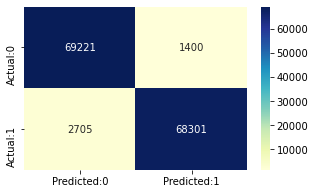

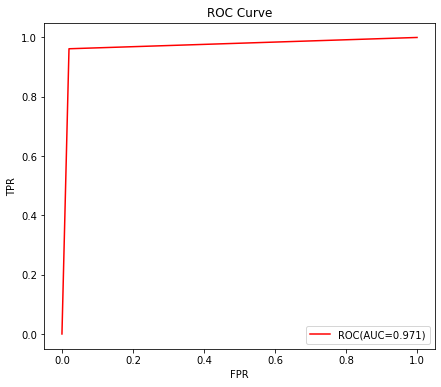

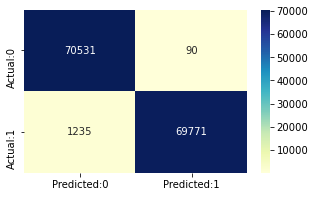

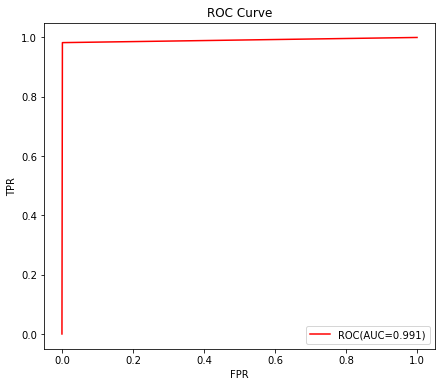

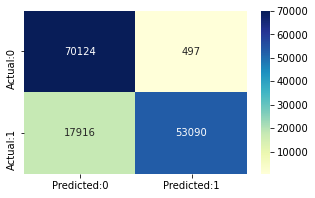

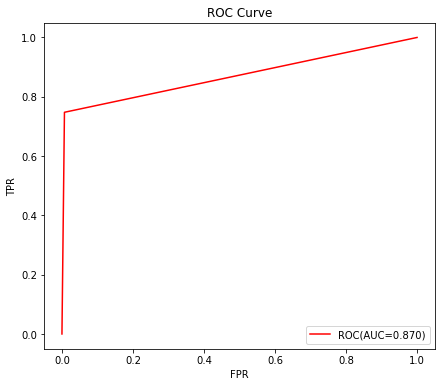

In [65]:
model=LogisticRegression()
#training the Logistic Regression Model with Training Data
model.fit(X_train_sm, Y_train_sm)
X_train_pred=model.predict(X_train_sm)
X_test_pred=model.predict(X_test_sm)
print('Logistic Regression:\n')
model_calculation(Y_test_sm,X_test_pred,Y_train_sm,X_train_pred)

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='gini',max_depth=10,min_samples_split=5,min_samples_leaf=1)
classifier.fit(X_train_sm,Y_train_sm)
X_train_pred=classifier.predict(X_train_sm)
X_test_pred=classifier.predict(X_test_sm)
print('\nRandom Forest:\n')
model_calculation(Y_test_sm,X_test_pred,Y_train_sm,X_train_pred)

from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train_sm,Y_train_sm) # fitting the data
y_p = nv.predict(X_train_sm)
y_pred = nv.predict(X_test_sm)
print('\nNaive Bayes:\n')
model_calculation(Y_test_sm,y_pred,Y_train_sm,y_p)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=X_train_sm.copy()
x2=X_test_sm.copy()
scaler.fit(x1)
X_train_sm=scaler.fit_transform(x1)
X_test_sm=scaler.transform(x2)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x1,Y_train_sm)
y_p=knn.predict(X_train_sm)
y_pred = knn.predict(X_test_sm)
print('\nKNN:\n')
model_calculation(Y_test_sm,y_pred,Y_train_sm,y_p)